# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Часть 1. Приоритизация гипотез.**

**Задачи:**

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

**Задачи:**

* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его. Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

## Приоретизация гипотез

В датафрейме нам даны 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Применим фреймворки ICE и RICE для приоретизации гипотез и посмотрим, что у нас получится.

### Загрузим данные и подготовим их к анализу

В самом начале импортируем необходимые нам библиотеки.

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт модуля stats
import scipy.stats as stats

Прочитаем файл с данными о гипотезах и сохраним его в переменную `hypothesis_df`.

In [2]:
# чтение и сохранение в соответствующую переменную
hypothesis_df = pd.read_csv('/hypothesis.csv')
# снимем ограничение на ширину столбцов при отображении
pd.set_option('display.max_colwidth', 0)

Посмотрим, какие данные у нас имеются.

In [3]:
# общая информация о таблице hypothesis_df
hypothesis_df.info()
# просмотр таблицы hypothesis_df
hypothesis_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице `hypothesis_df` 9 строк и 5 столбцов. Типы данных, встречаемых в столбцах: `object`(1) и `int`(4).

Описание данных согласно документации:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Видим, что у типы данных в столбцах нас устраивают. Также обращаем внимание, что нет пропусков.

### Применим фреймворк ICE

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач, который рассчитывается по формуле: $$ICE = \frac{Impact * Confidence}{Efforts}$$.

In [4]:
# добавим новый расчётный столбец ICE
hypothesis_df['ICE'] = (
    (hypothesis_df['Impact'] * hypothesis_df['Confidence'])
    / hypothesis_df['Efforts']
)
# выведем датафрейм, отсортировав гипотезы по убыванию приоритета
hypothesis_df.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Видим, что здесь лидирует гипотеза под номером 8, далее идёт номер 0, тройку замыкает гипотеза под номером 7.

### Применим фреймворк RICE

RICE (от англ. reach, impact, confidence, effort / ease «охват, влияние, уверенность, усилия / простота») — модификация метода приоретизации задач ICE, который рассчитывается по формуле: $$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$.

In [5]:
# добавим новый расчётный столбец ICE
hypothesis_df['RICE'] = (
    (hypothesis_df['Reach'] * hypothesis_df['Impact'] * hypothesis_df['Confidence'])
    / hypothesis_df['Efforts']
)
# выведем датафрейм, отсортировав гипотезы по убыванию приоритета
hypothesis_df.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


По этому методу у нас лидирует с огромным отрывом гипотеза под номером 7, далее следует номер 2, третье и четвёртое место разделили гипотезы под номерами 0 и 6.

**Вывод**

Применение двух разных методов приоретизации гипотез обернулось для нас разными результатами. Гипотезы 8, 0 и 7 оказались самыми сильными. Но, стоило нам учесть то, скольких пользователей будет затрагивать каждая из гипотез, как сразу гипотеза 7 вырвалась в лидеры с большим преимуществом, так как она единсвенная из всех имеет максимальный охват пользователей. Из-за того же пользовтельского охвата на второе место вырвалась гипотеза 2, хотя изначально не считалась особо сильной.

## Анализ A/B-теста

### Просмотр данных

Прочитаем файлы, в которых у нас описаны результаты проведения A/B-теста, сохраним в переменные `orders` и `visitors`.

In [6]:
# чтение и сохранение в соответствующие переменные
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

Посмотрим, какие данные у нас имеются.

In [7]:
# общая информация о таблице orders
orders.info()
# получение первых 10 строк таблицы orders
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


В таблице `orders` 1197 строк и 5 столбцов. Типы данных, встречаемых в столбцах: `object`(2) и `int`(3).

Описание данных согласно документации:
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

В названиях колонок видно нарушения стиля: используется camelCase вместо snake_case.
Видим, что у столбца `date`, содержащего дату, некорректный тип данных `object`, который необходимо изменить на `datetime`. 

Рассмотрим содержание столбца с датами.

In [8]:
# выведем минимальные и максимальные значения из столба с датами
print('Время совершения заказа лежит в интервале от {} до {}'
      .format(orders['date'].min(), orders['date'].max()))

Время совершения заказа лежит в интервале от 2019-08-01 до 2019-08-31


Проверим, нет ли чего лишнего в группах.

In [9]:
# выведем группы и количество строк в них
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Проверим пересечение пользователей в группах.

In [10]:
# создадим датафрейм с уникальными id пользователей, у которых больше одной группы
double_users = (
    orders.groupby('visitorId')
          .agg({'group': 'nunique'})
          .reset_index()
          .query('group > 1')
)
# проверим результат
double_users.sample(10)

,visitorId,group
958,3963646447,2
744,3062433592,2
436,1801183820,2
622,2600415354,2
1023,4256040402,2
340,1404934699,2
55,237748145,2
950,3941795274,2
491,2044997962,2
44,199603092,2


Кто-то есть. Посмотрим на их количество.

In [11]:
# выведем количество строк датафрейма с отобранными пользователями
print(f'Количество пользователей, попавших в обе группы: {double_users.shape[0]}')

Количество пользователей, попавших в обе группы: 58


Взглянем на транзакции, которые приходятся на них.

In [12]:
# выведем отобранные транзакции
display(orders[orders['visitorId']
        .isin(double_users['visitorId'].unique())]
        .sort_values(by='visitorId'))

,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


Получили 181 транзакцию. Их нужно будет убрать из исследования, так как это какая-то ошибка.

In [13]:
# общая информация о таблице orders
visitors.info()
# получение первых 10 строк таблицы orders
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


В таблице `visitors` 62 строки и 3 столбца. Типы данных, встречаемых в столбцах: `object`(2) и `int`(1).

Описание данных согласно документации:
* `date` — дата;
* `group` - группа A/B-теста;
* `visitors` - количество пользователей в указанную дату в указанной группе A/B-теста.

Видим, что у столбца `date`, содержащего дату, некорректный тип данных `object`, который необходимо изменить на `datetime`. 

Рассмотрим содержание столбца с датами.

In [14]:
# выведем минимальные и максимальные значения из столба с датами
print('Время подсчёта количества пользователей лежит в интервале от {} до {}'
      .format(visitors['date'].min(), visitors['date'].max()))

Время подсчёта количества пользователей лежит в интервале от 2019-08-01 до 2019-08-31


Диапазон дат таблицы `visitors` совпадает с диапазоном дат таблицы `orders`. Проверим, нет ли чего лишнего в группах.

In [15]:
# выведем группы и количество строк в них
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

### Предобработка данных

#### Переименуем столбцы

In [16]:
# переименуем два столбца таблицы orders
orders = orders.rename(columns={'transactionId': 'transaction_id',
                                'visitorId': 'visitor_id'})
# проверим результат
orders.sample(10)

,transaction_id,visitor_id,date,revenue,group
304,609915801,2780786433,2019-08-28,1200,A
448,35929812,2168467118,2019-08-03,2970,A
446,455568416,1414758703,2019-08-03,6677,A
1016,3229560351,427004138,2019-08-31,500,B
442,1228436647,872679699,2019-08-03,490,B
132,665271848,3873846164,2019-08-22,6922,B
399,1853288890,4171878080,2019-08-28,9990,B
1156,1254962016,2654030115,2019-08-14,1980,A
578,1570911533,2038680547,2019-08-04,1530,A
610,2461347779,4223733735,2019-08-04,2830,A


#### Удалим лишние транзакции

In [17]:
# оставим записи только о тех пользователях, которые не содержатся в таблице
# с пересекающими пользователями
orders = orders[orders['visitor_id'].isin(double_users['visitorId'].unique()) == False]
# проверим результат
print(f'Количество оставшихся транзакций: {orders.shape[0]}')

Количество оставшихся транзакций: 1016


#### Приведём столбцы к нужному типу

In [18]:
# приведём к нужному типу столбцы с датами в обеих таблицах
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим, что всё получилось.

In [19]:
# выводим информацию о таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1016 non-null int64
visitor_id        1016 non-null int64
date              1016 non-null datetime64[ns]
revenue           1016 non-null int64
group             1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [20]:
# выводим информацию о таблице visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод**

Причесали немного наши датафреймы, переименовав некоторые столбцы. Привели данные к нужным типам и удалили ошибочные строки.

### Проанализируем A/B-тест

Проверка гипотезы начинается с формулировки нулевой гипотезы (H₀), которая всегда формулируется так, чтобы использовать знак равенства. Исходя из неё сформулируем альтернативную (H₁).

H₀: выручка пользователей в группах А и В равна.

H₁: выручка пользователей в группах А и В различается.

Теперь можем переходить непосредственно к анализу.

#### Построим график кумулятивной выручки по группам

Сначала соберём массив уникальных пар дат и групп теста.

In [21]:
# создаём массив уникальных пар дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()
# проверяем результат
dates_groups.sample(10)

,date,group
167,2019-08-23,A
958,2019-08-31,A
753,2019-08-21,B
228,2019-08-18,B
297,2019-08-25,A
7,2019-08-15,A
719,2019-08-05,A
229,2019-08-18,A
0,2019-08-15,B
1068,2019-08-12,A


Далее соберём агрегированные кумулятивные данные о заказах и о пользователях по дням.

In [22]:
# соберём агрегированные кумулятивные данные о заказах по дням
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
# проверяем результат
orders_aggregated.sample(10)

,date,group,transaction_id,visitor_id,revenue
66,2019-08-01,B,17,17,59758
86,2019-08-22,A,339,321,2366147
125,2019-08-17,B,320,314,2155542
1116,2019-08-13,A,214,201,1558426
930,2019-08-31,B,548,528,5068972
533,2019-08-29,B,510,490,4746610
690,2019-08-30,B,531,511,4955833
539,2019-08-20,B,368,360,3768059
124,2019-08-17,A,265,251,1817160
291,2019-08-03,A,66,60,346854


In [23]:
# соберём агрегированные кумулятивные данные о пользователях по дням
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
# проверяем результат
visitors_aggregated.sample(10)

,date,group,visitors
464,2019-08-26,B,15803
699,2019-08-05,B,3280
1114,2019-08-13,B,8310
1043,2019-08-11,B,6998
291,2019-08-03,A,1845
286,2019-08-24,A,14322
181,2019-08-23,B,14070
47,2019-08-16,B,10013
835,2019-08-08,A,5239
567,2019-08-09,B,5908


Теперь объёдиним таблицы с кумулятивными данными.

In [24]:
# объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# переименовываем столбцы
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# проверяем результат
cumulative_data.sample(10)

,date,group,orders,buyers,revenue,visitors
44,2019-08-23,A,359,341,2424010,13927
33,2019-08-17,B,320,314,2155542,10434
27,2019-08-14,B,263,258,1650268,9056
26,2019-08-14,A,231,218,1601692,9058
42,2019-08-22,A,339,321,2366147,13459
48,2019-08-25,A,380,362,2597907,14943
19,2019-08-10,B,198,195,1268123,6277
49,2019-08-25,B,440,424,4294526,15127
53,2019-08-27,B,473,456,4579312,16523
12,2019-08-07,A,130,120,638580,4629


Создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в каждой группе.

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = (
    cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
)
# посмотрим резульат
cumulative_revenue_a.sample(10)

,date,revenue,orders
44,2019-08-23,2424010,359
30,2019-08-16,1782420,259
18,2019-08-10,1013731,170
46,2019-08-24,2546023,372
2,2019-08-02,234381,42
28,2019-08-15,1682569,241
20,2019-08-11,1074396,181
14,2019-08-08,727219,144
4,2019-08-03,346854,66
52,2019-08-27,2940471,419


In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = (
    cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
)   
# посмотрим резульат
cumulative_revenue_b.sample(10)

,date,revenue,orders
27,2019-08-14,1650268,263
31,2019-08-16,2074677,307
9,2019-08-05,475648,89
37,2019-08-19,3620785,348
49,2019-08-25,4294526,440
3,2019-08-02,221801,40
33,2019-08-17,2155542,320
39,2019-08-20,3768059,368
1,2019-08-01,59758,17
57,2019-08-29,4746610,510


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


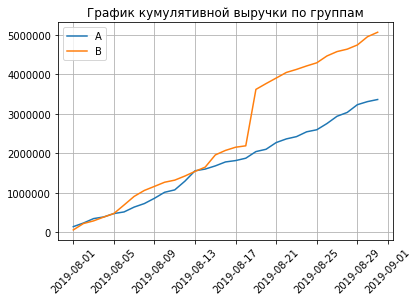

In [27]:
# построим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# построим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
# зададим размер графика
plt.rcParams["figure.figsize"] = (15,5)
# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# задаём название графика
plt.title('График кумулятивной выручки по группам')
# выводим легенду
plt.legend();

**Вывод**

Выручка у обеих групп увеличивается в течение всего теста, что является хорошим знаком. Видим резкий рост выручи у группы В в районе 19 августа 2019 года. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

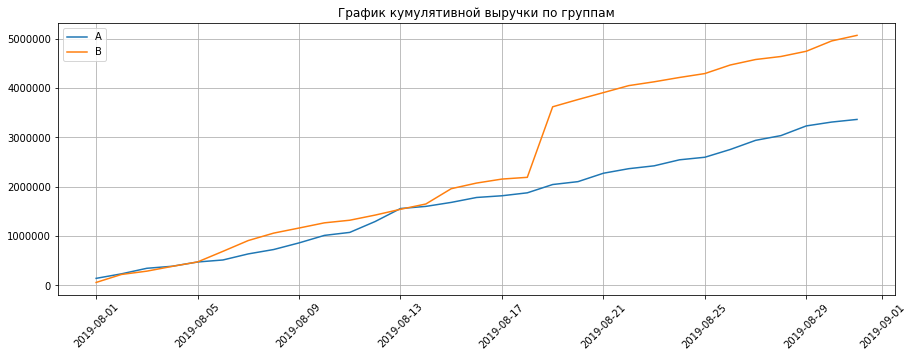

In [53]:
# зададим размер графика
plt.rcParams["figure.figsize"] = (15,5)

# построим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# построим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# задаём название графика
plt.title('График кумулятивной выручки по группам')
# выводим легенду
plt.legend();

<hr style="border: 2px solid green;" />

#### Построим график кумулятивного среднего чека по группам

Для построения графиков среднего чека по группам разделим кумулятивную выручку на кумулятивное число заказов.

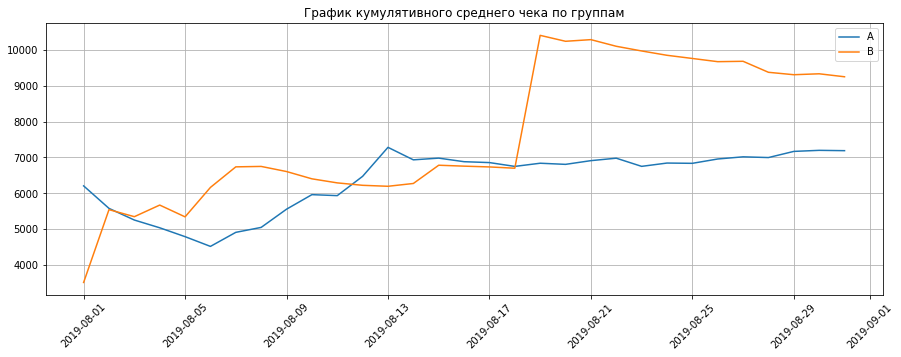

In [28]:
# построим график среднего чека группы А
plt.plot(cumulative_revenue_a['date'],
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')
# построим график среднего чека группы В
plt.plot(cumulative_revenue_b['date'],
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'],
         label='B')
# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# задаём название графика
plt.title('График кумулятивного среднего чека по группам')
# выводим легенду
plt.legend();

**Вывод**

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и падает после резкого всплеска 19 августа 2019 года для группы B. Всплеск может указывать на то, что в группу B в этот момент попали крупные заказы, из-за которых ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Для этого соберём кумулятивные данные о выручке по группам в единый датафрейм.

In [29]:
# собираем данные в единый датафрейм
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date',
    how='left', suffixes=['A', 'B'])
# проверяем результат
merged_cumulative_revenue.sample(10)

,date,revenueA,ordersA,revenueB,ordersB
21,2019-08-22,2366147,339,4050134,401
30,2019-08-31,3364656,468,5068972,548
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
15,2019-08-16,1782420,259,2074677,307
28,2019-08-29,3233233,451,4746610,510
6,2019-08-07,638580,130,909654,135
0,2019-08-01,142779,23,59758,17
13,2019-08-14,1601692,231,1650268,263
14,2019-08-15,1682569,241,1960427,289


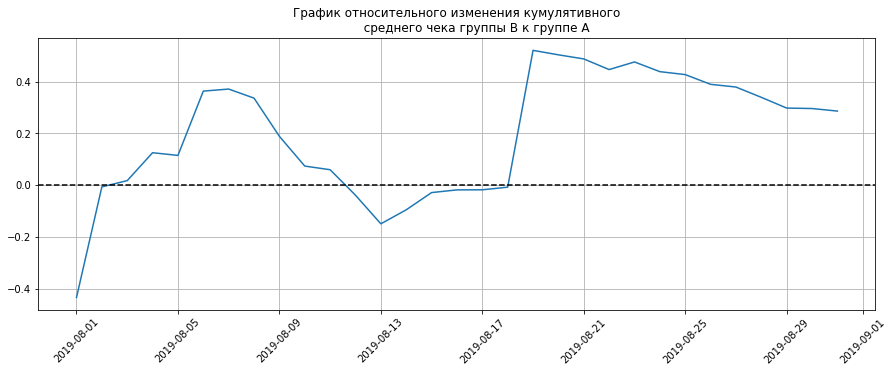

In [30]:
# cтроим график отношения средних чеков в группах
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB'] / 
          merged_cumulative_revenue['ordersB']) / 
         (merged_cumulative_revenue['revenueA'] / 
          merged_cumulative_revenue['ordersA'])-1)
# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# задаём название графика
plt.title('''График относительного изменения кумулятивного
          среднего чека группы B к группе A''')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод**

Снова видим резкое изменение соотношения 19 августа 2019 года, что подтверждает потенциальное наличие аномальных заказов в этот день. 

#### Построим график кумулятивной конверсии по группам

Добавим в таблицу с кумулятивными данными столбец с конверсией.

In [31]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = (
    cumulative_data['orders'] / cumulative_data['visitors']
)
# проверяем результат
cumulative_data.sample(10)

,date,group,orders,buyers,revenue,visitors,conversion
51,2019-08-26,B,462,446,4467965,15803,0.029235
27,2019-08-14,B,263,258,1650268,9056,0.029042
28,2019-08-15,A,241,228,1682569,9686,0.024881
38,2019-08-20,A,309,293,2103613,12204,0.025320
29,2019-08-15,B,289,284,1960427,9600,0.030104
36,2019-08-19,A,299,283,2044934,11629,0.025712
9,2019-08-05,B,89,87,475648,3280,0.027134
0,2019-08-01,A,23,19,142779,719,0.031989
46,2019-08-24,A,372,354,2546023,14322,0.025974
2,2019-08-02,A,42,36,234381,1338,0.031390


Далее разделим этот датафрейм по группам теста.

In [32]:
# сохраняем отдельно данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
# выводим результат
cumulative_data_a.sample(10)

,date,group,orders,buyers,revenue,visitors,conversion
48,2019-08-25,A,380,362,2597907,14943,0.025430
6,2019-08-04,A,77,71,388030,2562,0.030055
10,2019-08-06,A,114,104,515332,3985,0.028607
0,2019-08-01,A,23,19,142779,719,0.031989
18,2019-08-10,A,170,158,1013731,6262,0.027148
2,2019-08-02,A,42,36,234381,1338,0.031390
52,2019-08-27,A,419,400,2940471,16376,0.025586
24,2019-08-13,A,214,201,1558426,8323,0.025712
42,2019-08-22,A,339,321,2366147,13459,0.025188
38,2019-08-20,A,309,293,2103613,12204,0.025320


In [33]:
# сохраняем отдельно данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']
# выводим результат
cumulative_data_b.sample(10)

,date,group,orders,buyers,revenue,visitors,conversion
45,2019-08-23,B,414,400,4127403,14070,0.029424
19,2019-08-10,B,198,195,1268123,6277,0.031544
57,2019-08-29,B,510,490,4746610,17708,0.028801
27,2019-08-14,B,263,258,1650268,9056,0.029042
39,2019-08-20,B,368,360,3768059,12218,0.030119
7,2019-08-04,B,68,66,385740,2573,0.026428
23,2019-08-12,B,229,225,1425237,7541,0.030367
29,2019-08-15,B,289,284,1960427,9600,0.030104
31,2019-08-16,B,307,302,2074677,10013,0.030660
47,2019-08-24,B,428,412,4215269,14448,0.029623


Далее строим график кумулятивной конверсии по группам.

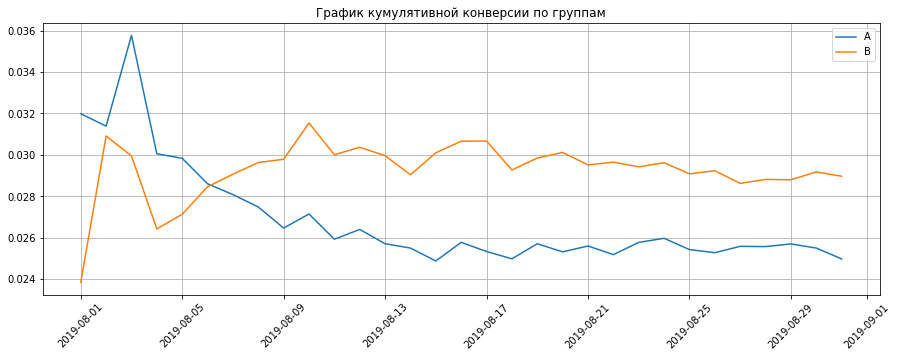

In [34]:
# строим график для группы А
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
# строим график для группы В
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# задаём название графика
plt.title('График кумулятивной конверсии по группам')
# выводим легенду
plt.legend();

**Вывод**

Видим, что конверсия группы В после 6 августа вырвалась вперёд, затем конверсия в обеих группах стабилизировалась.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A

Сначала объединим кумулятивные данные по дате и конверсии.

In [35]:
# мёрджим
merged_cumulative_conv = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']],
           left_on='date', right_on='date', how='left',
           suffixes=['A', 'B'])
)
# выводим результат
merged_cumulative_conv.sample(10)

,date,conversionA,conversionB
25,2019-08-26,0.025279,0.029235
12,2019-08-13,0.025712,0.029964
28,2019-08-29,0.025702,0.028801
2,2019-08-03,0.035772,0.029950
24,2019-08-25,0.025430,0.029087
7,2019-08-08,0.027486,0.029634
0,2019-08-01,0.031989,0.023843
19,2019-08-20,0.025320,0.030119
14,2019-08-15,0.024881,0.030104
11,2019-08-12,0.026403,0.030367


Затем построим необходимый график.

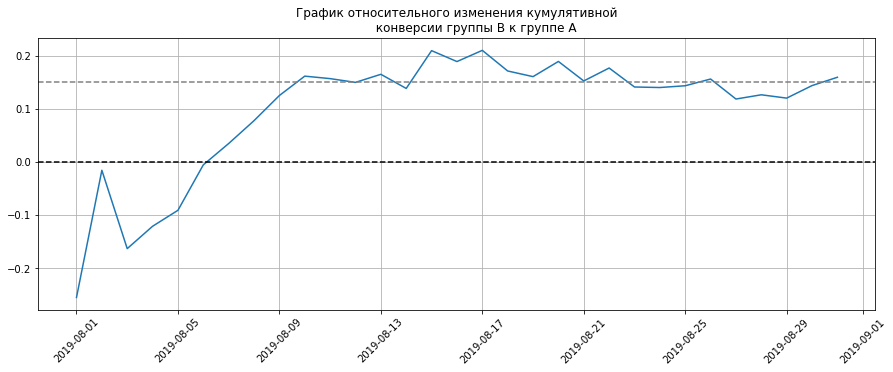

In [36]:
# строим график
plt.plot(merged_cumulative_conv['date'],
         merged_cumulative_conv['conversionB'] / 
         merged_cumulative_conv['conversionA']-1)
# задаём название графика
plt.title('''График относительного изменения кумулятивной
          конверсии группы B к группе A''')
# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# добавим пунктирные линии
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--');

**Вывод**

Конверсия в группе В вырвалась вперёд после 6 августа и стабилизировалась около прироста в 15% относительно группы А.

#### Построим точечный график количества заказов по пользователям

Создадим датафрейм, в котором сохраним количество заказов по каждому пользователю.

In [37]:
# сгруппируем данные по пользователям и посчитаем количество заказов
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
# переименуем столбцы
orders_by_users.columns = ['user_id', 'orders']
# выведем результат
orders_by_users.sample(10)

,user_id,orders
758,3261022559,1
766,3289144202,1
91,399216493,1
81,363280180,1
529,2306096143,2
764,3283584911,1
202,888512513,1
657,2870367609,1
393,1700445283,1
807,3469608676,2


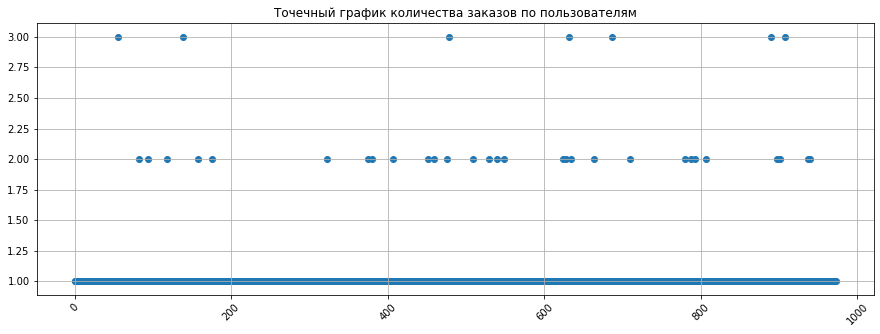

In [38]:
# создадим серию из чисел от 0 до количества пользователей для оси Х
x_values = pd.Series(range(0, len(orders_by_users)))
# строим точечный график
plt.scatter(x_values, orders_by_users['orders'])
# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# задаём название графика
plt.title('Точечный график количества заказов по пользователям');

**Вывод**

Подавляеющее большинство пользователей совершили по одному заказу, но есть доля тех, кто сделал два или даже целых три заказа. Но конкретная доля не ясна, поэтому не понятно, считать их аномалиями или нет.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

Данный расчёт поможет нам выберать границу для определения аномальных пользователей по количеству заказов.

In [39]:
# выведем значения 90-го, 95-го и 99-го перцентилей
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 1. 2.]


**Вывод**

Не более 5% пользователей совершали более 1 заказа, и не более 1% - больше 2 заказов. Отсеим пользователей, у которых больше 1 заказа.

#### Построим точечный график стоимостей заказов

Для построения график понадобится наш датафрейм с заказами.

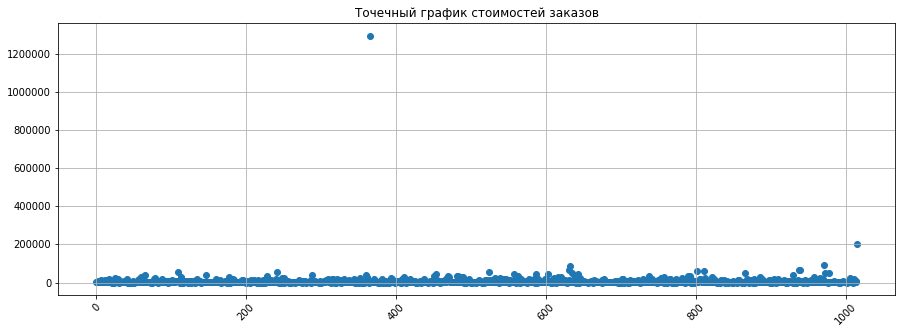

In [40]:
# создадим серию из чисел от 0 до количества заказов для оси Х
x_values = pd.Series(range(0, len(orders)))
# строим точечный график
plt.scatter(x_values, orders['revenue'])
# зададим поворот подписей по оси Х
plt.xticks(rotation=45)
# отобразим линии сетки
plt.grid(True)
# задаём название графика
plt.title('Точечный график стоимостей заказов');

**Вывод**

На графике видим заказ на 1,3 млн и на 200 тысяч, которые явно выбиваются из общего порядка. Посчитаем перцентили для отсева.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов

Данный расчёт поможет нам выберать границу для определения аномальных заказов по выручке.

In [41]:
# выведем значения 90-го, 95-го и 99-го перцентилей
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


**Вывод**

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. Будем отсеивать заказы стоимостью свыше 26785 рублей.

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Для этого подготовим данные о количестве заказов, выручке, количеству пользователей в конкретную дату, эти же значения на конкретную дату с накоплением.

In [42]:
# количество пользователей в конкретную дату в группе А
daily_visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
# переименуем столбцы
daily_visitors_a.columns = ['date', 'daily_visitors_a']
# количество пользователей с накоплением в конкретную дату в группе А
сummulative_visitors_a = daily_visitors_a.apply(
    lambda x: daily_visitors_a[daily_visitors_a['date'] <= x['date']].agg(
        {'date': 'max', 'daily_visitors_a': 'sum'}
    ),
    axis=1,
)
# переименуем столбцы
сummulative_visitors_a.columns = ['date', 'сummulative_visitors_a']
# количество пользователей в конкретную дату в группе В
daily_visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
# переименуем столбцы
daily_visitors_b.columns = ['date', 'daily_visitors_b']
# количество пользователей с накоплением в конкретную дату в группе В
сummulative_visitors_b = daily_visitors_b.apply(
    lambda x: daily_visitors_b[daily_visitors_b['date'] <= x['date']].agg(
        {'date': 'max', 'daily_visitors_b': 'sum'}
    ),
    axis=1,
)
# переименуем столбцы
сummulative_visitors_b.columns = ['date', 'сummulative_visitors_b']
# количество заказов и суммарная выручка в конкретную дату в группе А
daily_orders_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id',
                                    'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
# переименуем столбцы
daily_orders_a.columns = ['date', 'daily_orders_a', 'daily_revenue_a']
# количество заказов с накоплением и суммарная выручка с накоплением
# в конкретную дату в группе А
сummulative_orders_a = daily_orders_a.apply(
    lambda x: daily_orders_a[daily_orders_a['date'] <= x['date']].agg(
        {'date': 'max', 'daily_orders_a': 'sum', 'daily_revenue_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
# переименуем столбцы
сummulative_orders_a.columns = [
    'date',
    'сummulative_orders_a',
    'сummulative_revenue_a',
]
# количество заказов и суммарная выручка в конкретную дату в группе B
daily_orders_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id',
                                    'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
# переименуем столбцы
daily_orders_b.columns = ['date', 'daily_orders_b', 'daily_revenue_b']
# количество заказов с накоплением и суммарная выручка с накоплением
# в конкретную дату в группе B
сummulative_orders_b = daily_orders_b.apply(
    lambda x: daily_orders_b[daily_orders_b['date'] <= x['date']].agg(
        {'date': 'max', 'daily_orders_b': 'sum', 'daily_revenue_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
# переименуем столбцы
сummulative_orders_b.columns = [
    'date',
    'сummulative_orders_b',
    'сummulative_revenue_b',
]


Теперь объединим данные в единый датафрейм.

In [43]:
# мёрджим
df = (
    daily_orders_a.merge(
        daily_orders_b, left_on='date', right_on='date', how='left'
    )
    .merge(сummulative_orders_a, left_on='date', right_on='date', how='left')
    .merge(сummulative_orders_b, left_on='date', right_on='date', how='left')
    .merge(daily_visitors_a, left_on='date', right_on='date', how='left')
    .merge(daily_visitors_b, left_on='date', right_on='date', how='left')
    .merge(сummulative_visitors_a, left_on='date', right_on='date', how='left')
    .merge(сummulative_visitors_b, left_on='date', right_on='date', how='left')
)
# выводим результат
df.sample(10)

,date,daily_orders_a,daily_revenue_a,daily_orders_b,daily_revenue_b,сummulative_orders_a,сummulative_revenue_a,сummulative_orders_b,сummulative_revenue_b,daily_visitors_a,daily_visitors_b,сummulative_visitors_a,сummulative_visitors_b
26,2019-08-27,23,185350,11,111347,419,2940471,473,4579312,711,720,16376,16523
24,2019-08-25,8,51884,12,79257,380,2597907,440,4294526,621,679,14943,15127
28,2019-08-29,17,196300,15,106100,451,3233233,510,4746610,577,531,17547,17708
23,2019-08-24,13,122013,14,87866,372,2546023,428,4215269,395,378,14322,14448
21,2019-08-22,10,92365,21,141728,339,2366147,401,4050134,609,650,13459,13524
16,2019-08-17,6,34740,13,80865,265,1817160,320,2155542,412,421,10459,10434
25,2019-08-26,16,157214,22,173439,396,2755121,462,4467965,722,676,15665,15803
18,2019-08-19,21,168193,21,1429920,299,2044934,348,3620785,502,487,11629,11658
11,2019-08-12,19,220392,19,104054,200,1294788,229,1425237,595,543,7575,7541
27,2019-08-28,15,96462,22,61198,434,3036933,495,4640510,594,654,16970,17177


Далее посчитаем статистическую значимость различия в конверсии между группами. Для этого создадим датафреймы orders_by_users_a и orders_by_users_b со столбцами `user_id` и `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [44]:
# число совершённых заказов для пользователей группы А, совершивших хотя бы один заказ
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
# переименуем столбцы
orders_by_users_a.columns = ['user_id', 'orders']
# число совершённых заказов для пользователей группы В, совершивших хотя бы один заказ
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
# переименуем столбцы
orders_by_users_b.columns = ['user_id', 'orders']

Чтобы подготовить выборки к проверке критерием Манна-Уитни, создадим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [45]:
# создаём переменнуб для группы А
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['daily_visitors_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# создаём переменнуб для группы В
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['daily_visitors_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Посчитаем статистическую значимость различия конверсии по результатам с помощью теста Манна-Уитни.
Выведем p-value для сравнения конверсии между группами. Посчитаем относительное различие в конверсии между группами.

In [46]:
# тест Манна-Уитни
print('p-value: ', round(stats.mannwhitneyu(
                                            sample_a,
                                            sample_b,
                                            alternative='two-sided')[1], 5))
# относительное различие в конверсии между группами
print(f'''относительное различие в конверсии между группами:
      {((df['daily_orders_b'].sum() / df['daily_visitors_b'].sum()) /
      (df['daily_orders_a'].sum()/df['daily_visitors_a'].sum())-1):.5f}''')

p-value:  0.01102
относительное различие в конверсии между группами:
      0.15980


**Вывод**

p-value меньше 0.05, потому нулевая гипотеза отвергается. Согласно "сырым данным" между группами есть статистически значимые различия, так как относительный прирост конверсии группы В к конверсии группы А составляет 15.98%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию `mannwhitneyu()` данные о выручке с заказов.

In [47]:
# тест Манна-Уитни
print('p-value: ',
      round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
      orders[orders['group']=='B']['revenue'], alternative='two-sided')[1], 5))
# относительное различие в конверсии между группами
print(f'''относительное различие среднего чека:
      {(orders[orders['group']=='B']['revenue'].mean() / 
       orders[orders['group']=='A']['revenue'].mean() - 1):.5f}''')

p-value:  0.82949
относительное различие среднего чека:
      0.28660


**Вывод**

p-value больше 0.05 - статистически значимых различий в среднем чеке между группами нет. А вот относительное различие среднего чека составляет 28.66% в пользу группы В.

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Создадим датафрейм с аномальными пользователями. Для этого отсеим пользователей, у которых больше 1 заказа. Также будем отсеивать заказы стоимостью свыше 26785 рублей, после чего объединим их.

In [48]:
# пользователи, у которых более 1 заказа
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 1]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 1]['user_id'],
    ],
    axis=0,
)
# пользователи, у которых стоимость заказа выше 26785
users_with_expensive_orders = orders[orders['revenue'] > 26785]['visitor_id']
# объединяем аномальных пользователей
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# проверим резульат
print(abnormal_users.sample(10))
# выведем количество отобранных пользователей
print(f'Количество аномальных пользователей: {abnormal_users.shape[0]}')

421     3362039251
208     1637811943
273     2278620397
1006    2261934787
928     204675465 
1038    1605520752
486     3935952912
73      2947100995
310     2988190573
388     3077396270
dtype: int64
Количество аномальных пользователей: 86


Посчитаем статистическую значимость различия конверсии после удаления аномальных пользователей. Создадим датафреймы с очищенными данными по каждой группе.

In [49]:
# очищаем данные по группе А
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['daily_visitors_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# очищаем данные по группе В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['daily_visitors_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Посчитаем статистическую значимость различия конверсии по результатам с помощью теста Манна-Уитни.
Выведем p-value для сравнения конверсии между группами. Посчитаем относительное различие в конверсии между группами.

In [50]:
# тест Манна-Уитни
print('p-value: ', round(stats.mannwhitneyu(
                                      sample_a_filtered,
                                      sample_b_filtered,
                                      alternative='two-sided')[1], 5))
# относительное различие в конверсии между группами
print(f'''относительное различие в конверсии между группами:
      {(sample_b_filtered.mean() / sample_a_filtered.mean() - 1):.5f}''')

p-value:  0.01593
относительное различие в конверсии между группами:
      0.17393


**Вывод**

p-value так и остался менее 0.05, поэтому нулевая гипотеза отвергается, как и в случае с неочищенными данными. Относительный прирост конверсии группы В к группе А подрос с 15.98% до 17.39%, что указывает на статистически значимые различия.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Теперь сравним разницу по средним чекам между группами в очищенных данных.

In [51]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            alternative='two-sided'
        )[1]
    )
)

print(
    "относительное различие среднего чека: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.727
относительное различие среднего чека: -0.034


**Вывод**

p-value больше 0.05 - статистически значимых различий в среднем чеке между группами нет, как и в случае с сырыми данными. А вот относительное различие среднего чека составляло 28.66% в пользу группы В, теперь же они практически равны, потому что теперь средний чек уже в группе А больше всего лишь на 3.4%.

## Результаты теста

* Есть статистически значимые различия по конверсии между группами и по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A;
* График различия среднего чека говорит о том, что результаты группы B выше из-за аномальных пользователей, но даже с ними постепенно ухудшаются.

Нас интересовало увеличение выручки. Она складывается из количества заказов и среднего чека. Средний чек не изменился, но конверсия в группе В выше и по «сырым» данным, и после фильтрации аномалий. Больше конверсия в покупку - больше заказов при таком же среднем чеке - больше общая выручка. Исходя из обнаруженных фактов, тест следует остановить и признать его успешным.